In [1]:
import pandas as pd
import os
import numpy as np
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
from itertools import chain
import datetime
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github


/content/drive/MyDrive/Github


In [3]:
source_dir=r'./Stress-Predict-Dataset-main/Raw_data/'

In [ ]:
samples_list=[]
for samples in sorted(os.listdir(source_dir)):
    if samples.startswith('.'):
        continue
    samples_list.append(samples) 

In [ ]:
samples_list


['S01',
 'S02',
 'S03',
 'S04',
 'S05',
 'S06',
 'S07',
 'S08',
 'S09',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35']

In [ ]:
tags=pd.read_csv(os.path.join(source_dir,"S01","tags_S01.csv"), index_col=False)

In [ ]:
index,d=tags

ValueError: ignored

In [ ]:
combined_HR=[]

In [ ]:
combined_label=[]
flag=1

In [ ]:
for sample in samples_list:
  for read_data in os.listdir(source_dir+sample):
    if read_data=='tags_'+sample+".csv":
      label_df=pd.read_csv(os.path.join(source_dir,sample,read_data))
      for row in label_df.itertuples():
        index, label=row
        label_dict={"sample":sample,"Label":int(label)}
        combined_label.append(label_dict)

In [ ]:

for sample in samples_list:
    acc_df=pd.read_csv(os.path.join(source_dir,sample,"ACC.csv"),skiprows=[1] )
    BVP_df=pd.read_csv(os.path.join(source_dir,sample,"BVP.csv"),skiprows=[1])
    EDA_df=pd.read_csv(os.path.join(source_dir,sample,"EDA.csv"),skiprows=[1])
    HR_df=pd.read_csv(os.path.join(source_dir,sample,"HR.csv"), skiprows=[1])
    IBI_df=pd.read_csv(os.path.join(source_dir,sample,"IBI.csv"))
    TEMP_df=pd.read_csv(os.path.join(source_dir,sample,"TEMP.csv"), skiprows=[1])
    initial_utc_value=int(floor(float(list(acc_df.columns)[0])))
    acc_df.rename(columns=({list(acc_df)[0]:"acc_x",list(acc_df)[1]:"acc_y",list(acc_df)[2]:"acc_z"}))


    tags_df=pd.read_csv(os.path.join(source_dir,sample,"tags_"+sample+".csv"))
    tags_df_int=tags_df.astype('int')
    # for utc_stamps in tags_df_int.itertuples():
    #   index, utc_stamps_value=utc_stamps
    ts_raw=[]
    logic=0
    samples=[]
    stress_logic=[]
      # print(initial_utc_value)
    r,c=acc_df.shape
    t_ch=datetime.timedelta(seconds=0)
    for ts in range(r):
      converted_time=datetime.datetime.utcfromtimestamp(initial_utc_value)+t_ch
      ts_raw.append(converted_time)
      t_ch=datetime.timedelta(seconds=1/32)
      initial_utc_value=converted_time.timestamp()
      for utc_stamps in tags_df_int.itertuples():
        index, utc_stamps_value=utc_stamps
        diff=abs(datetime.datetime.utcfromtimestamp(utc_stamps_value)-converted_time)
        if(int(diff.total_seconds())<=0):
          logic=1-logic
          break
      stress_logic.append(logic)
    # ts_dict={"utc_time":[ts_raw]}
      samples.append(sample)   
    combined_df=pd.concat([pd.DataFrame(samples),acc_df,EDA_df, HR_df, TEMP_df, pd.Series(ts_raw), pd.Series(stress_logic)], axis=1,ignore_index=True)
    # final_df=pd.concat([combined_df2,combined_df], axis=0)
    # combined_df2=combined_df.copy()
    combined_df.rename(columns={0: 'samples', 1: 'acc_x', 2:'acc_y', 3:'acc_z',4:'EDA',5:'HR', 6:'temperature', 7:'Date and time', 8:'label'}, inplace=True)

    combined_df.to_csv(source_dir+"/"+sample+"/"+sample+".csv")




                             

              
             


      

In [ ]:
pre_sample_df=pd.DataFrame()
for sample in samples_list:
    sample_df=pd.read_csv(os.path.join(source_dir,sample,sample+".csv"))
    final_df=pd.concat([pre_sample_df, sample_df], axis=0)
    pre_sample_df=final_df.copy()
final_df.to_csv(source_dir+"Stress_dataset.csv")    
      



In [4]:
df=pd.read_csv(os.path.join(source_dir, "Stress_dataset.csv"))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713928 entries, 0 to 3713927
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0.1   int64  
 1   Unnamed: 0     int64  
 2   samples        object 
 3   acc_x          int64  
 4   acc_y          int64  
 5   acc_z          int64  
 6   EDA            float64
 7   HR             float64
 8   temperature    float64
 9   Date and time  object 
 10  label          int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 311.7+ MB


In [6]:
df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
samples                0
acc_x                  0
acc_y                  0
acc_z                  0
EDA              3249660
HR               3598208
temperature      3249728
Date and time          0
label                  0
dtype: int64

In [7]:
df=df.fillna(method='ffill')


In [8]:
df.isna().sum()

Unnamed: 0.1     0
Unnamed: 0       0
samples          0
acc_x            0
acc_y            0
acc_z            0
EDA              0
HR               0
temperature      0
Date and time    0
label            0
dtype: int64

In [9]:
df=df.drop(columns=['Unnamed: 0.1'], axis=1)

In [10]:
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [11]:
df.head()

,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label
0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0
1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0
2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0
3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0
4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0


In [12]:
df['Date and time']=pd.to_datetime(df['Date and time'])

In [13]:

df['hour'] = df['Date and time'].dt.hour
df['day_of_week'] = df['Date and time'].dt.dayofweek
df['month'] = df['Date and time'].dt.month
df['year'] = df['Date and time'].dt.year

In [14]:
df

,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label,hour,day_of_week,month,year
0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0,9,0,2,2022
1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0,9,0,2,2022
2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0,9,0,2,2022
3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0,9,0,2,2022
4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0,9,0,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713923,S35,-17,1,62,0.228344,65.50,32.21,2022-03-09 16:10:46.781250,0,16,2,3,2022
3713924,S35,-17,2,62,0.228344,65.50,32.21,2022-03-09 16:10:46.812500,0,16,2,3,2022
3713925,S35,-17,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.843750,0,16,2,3,2022
3713926,S35,-16,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.875000,0,16,2,3,2022


In [15]:
df = pd.get_dummies(df, columns=['day_of_week', 'month'])


In [16]:
df

,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label,hour,year,day_of_week_0,day_of_week_2,month_2,month_3
0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0,9,2022,1,0,1,0
1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0,9,2022,1,0,1,0
2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0,9,2022,1,0,1,0
3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0,9,2022,1,0,1,0
4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0,9,2022,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713923,S35,-17,1,62,0.228344,65.50,32.21,2022-03-09 16:10:46.781250,0,16,2022,0,1,0,1
3713924,S35,-17,2,62,0.228344,65.50,32.21,2022-03-09 16:10:46.812500,0,16,2022,0,1,0,1
3713925,S35,-17,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.843750,0,16,2022,0,1,0,1
3713926,S35,-16,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.875000,0,16,2022,0,1,0,1


In [17]:
df=df.drop(columns=['Date and time','samples'])

In [18]:
df.describe()

,acc_x,acc_y,acc_z,EDA,HR,temperature,label,hour,year,day_of_week_0,day_of_week_2,month_2,month_3
count,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3713928.0,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06
mean,-3.411041e+01,-1.266632e+00,3.756086e+01,5.797673e-01,7.669192e+01,3.044306e+01,2.941376e-01,1.239798e+01,2022.0,9.110160e-01,8.898395e-02,7.401468e-01,2.598532e-01
std,2.182198e+01,2.087270e+01,2.594190e+01,7.564431e-01,1.329531e+01,2.623050e+00,4.556542e-01,2.156371e+00,0.0,2.847206e-01,2.847206e-01,4.385539e-01,4.385539e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,4.900000e+01,2.113000e+01,0.000000e+00,9.000000e+00,2022.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.200000e+01,-1.200000e+01,2.300000e+01,1.537600e-01,6.575000e+01,2.893000e+01,0.000000e+00,1.100000e+01,2022.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-3.400000e+01,-2.000000e+00,4.700000e+01,3.011310e-01,7.402000e+01,3.061000e+01,0.000000e+00,1.200000e+01,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,-2.100000e+01,8.000000e+00,5.700000e+01,7.333020e-01,8.582000e+01,3.197000e+01,1.000000e+00,1.500000e+01,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,1.100507e+01,1.467800e+02,3.639000e+01,1.000000e+00,1.600000e+01,2022.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


TypeError: ignored

<Figure size 640x480 with 0 Axes>

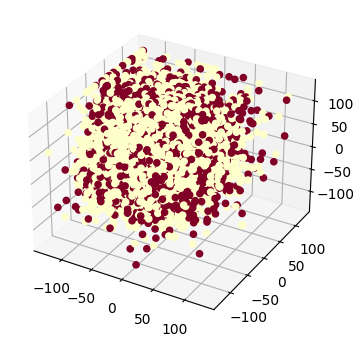

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(df['acc_x'], df['acc_y'], df['acc_z'], c=df['label'], cmap='YlOrRd', alpha=1)
plt.show()



In [ ]:
X=df.drop(columns=['label'])

In [ ]:
Y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True ,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[502156,  22589],
       [ 26022, 192019]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9345558478485055


In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8806554730532331

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8947429732349214

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8876433321237308

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf2 = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf2 = clf2.fit(X_train,y_train)



In [ ]:
tree_model = clf2.best_estimator_
# print (clf2.best_score_, clf2.best_params_) 
tree_model

DecisionTreeClassifier(max_depth=19)

In [ ]:
print (clf2.best_score_, clf2.best_params_) 


0.9324959889788547 {'max_depth': 19}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_rf = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9417355739068857


In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[505461,  19284],
       [ 23994, 194047]])

In [ ]:

recall_score(y_test, y_pred_rf)

0.8899564760756005

In [ ]:
precision_score(y_test, y_pred_rf)

0.9096052613075456

In [ ]:
f1_score(y_test, y_pred_rf)

0.8996735995845814

In [ ]:
rf=RandomForestClassifier()
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    print("Accuracy: ", score)

Accuracy:  0.9413532295977576
Accuracy:  0.9416305638501533
Accuracy:  0.9415511331662147
Accuracy:  0.9415066270858997
Accuracy:  0.9421259179978055
